Create a new Python application

In [1]:
 # Azure의 Custom Vision 라이브러리를 추가. 예측을 위하여 prediction을 포함
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
 # OpenAPI스펙에 맞춰서 Authentication을 처리할 수 있도록 해주는 코드
from msrest.authentication import ApiKeyCredentials
 # Matplotlib의 pyplot을 포함하여 예측 결과를 그리기
from matplotlib import pyplot as plt
 # Python Image 라이브러리로 이미지 그리기
from PIL import Image, ImageDraw, ImageFont
 # Python Numpy (수학 및 과학 연산 패키지) 포함
import numpy as np
 # 파일 처리 작업을 위해 os라이브러리 포함
import os

Create variables for your resource's Azure endpoint and keys.

In [ ]:
prediction_endpoint = ""
prediction_key = ""
project_id = ""
model_name = ""

Authenticate the client

In [3]:
 # 앞에서 지정한 API KEY를 써서 커스텀 비전 모델을 사용할 클라이언트를 인증
credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
 # endpoint를 써서 클라이언트 등록
predictor = CustomVisionPredictionClient(endpoint=prediction_endpoint, credentials=credentials)

Load image and get height, width and channels

In [ ]:
image_file = "./data/test-9.png"
 # 이미지 파일 등록되었음을 출력
print( 'Detecting objects in ', image_file)
 # Python Imaging Library의 image open함수를 써서 테스트 이미지 파일 오픈
image = Image.open(image_file)
 # Numpy에서 이미지의 shape을 높이, 폭, 채널 읽기
h, w, ch = np.array(image).shape

Detecting objects in  ./data/test-9.png


Detect objects in the test image

	bungee: 96.51% bbox.left = 0.28, bbox.top = 0.06, bbox.width = 0.64, bbox.height = 0.94
	bungee: 93.73% bbox.left = 0.01, bbox.top = 0.07, bbox.width = 0.32, bbox.height = 0.93
	bungee: 86.54% bbox.left = 0.32, bbox.top = 0.39, bbox.width = 0.44, bbox.height = 0.60
	bungee: 4.02% bbox.left = 0.50, bbox.top = 0.32, bbox.width = 0.43, bbox.height = 0.68
	bungee: 2.19% bbox.left = 0.74, bbox.top = 0.90, bbox.width = 0.26, bbox.height = 0.10
	bungee: 1.18% bbox.left = 0.87, bbox.top = 0.00, bbox.width = 0.12, bbox.height = 0.63


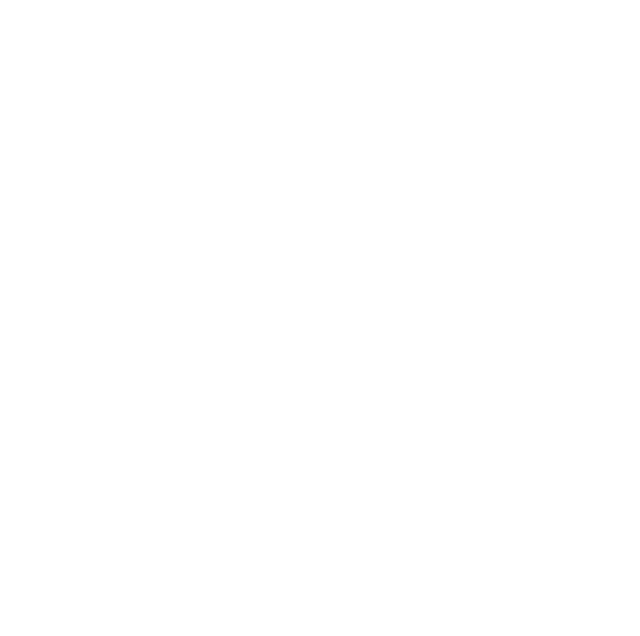

In [5]:
 # 테스트 이미지를 열고 모델에 적용해서 결과를 저장
with open(image_file, mode="rb") as image_data:
    results = predictor.detect_image(project_id, model_name, image_data)
 # 예측한 결과를 모두 출력 (텍스트로 표시됨)
# 예측한 결과를 모두 출력 (텍스트로 표시됨)
for prediction in results.predictions:
    print("\t" + prediction.tag_name + ": {0:.2f}% bbox.left = {1:.2f}, bbox.top = {2:.2f}, bbox.width = {3:.2f}, bbox.height = {4:.2f}".format(prediction.probability * 100, prediction.bounding_box.left, prediction.bounding_box.top, prediction.bounding_box.width, prediction.bounding_box.height))
 # 그래프 크기 지정하고 축 비활성화
fig = plt.figure(figsize=(8,8))
plt.axis('off')
 # 테스트 이미지를 그리기
# 개체 인식 박스를 magenta로 지정
draw = ImageDraw.Draw(image)
lineWidth = int(w/100)
color = 'magenta'

Create a figure for the results
Display the image with boxes around each detected object

Results saved in output.jpg


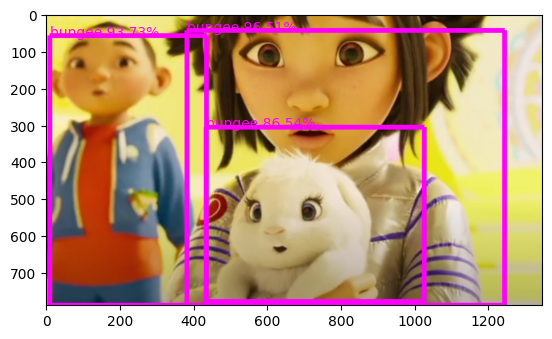

In [6]:
# 개체 인식된 모든 결과에 대해서
for prediction in results.predictions:

     # 확률이 50%이 이상인 경우 bounding box 값을 읽음
     if (prediction.probability*100) > 50:
        left = prediction.bounding_box.left * w
        top = prediction.bounding_box.top * h
        width = prediction.bounding_box.width * w
        height = prediction.bounding_box.height * h
    # bounding box 값을 magenta색으로 표시
        points = ((left,top), (left+width,top), (left+width,top+height), (left,top+height),(left,top))
        draw.line(points, fill=color, width=lineWidth)
        plt.annotate(prediction.tag_name + ' {0:.2f}%'.format(prediction.probability * 100), (left, top), color=color)    

 # bounding box 표시된 이미지를 output.jpg로 저장
plt.imshow(image)
outputfile = 'output.jpg'
fig.savefig(outputfile)
print('Results saved in', outputfile)